<a href="https://colab.research.google.com/github/ikabrain/UML501-Machine-Learning-Lab/blob/main/ML_assign5/ML_assign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 5
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Q1: Ridge Regression using Gradient Descent Optimization
---

Generate a dataset with atleast seven highly correlated columns and a target variable.

Implement Ridge Regression using Gradient Descent Optimization.

Take different values of learning rate (such as $0.0001$, $0.001$, $0.01$, $0.1$, $1$, $10$) and regularization parameter ($10^{-15}$, $10^{-10}$,$10^{-5}$,$10^{-3}$, $0$, $1$, $10$, $20$).

Choose the best parameters for which ridge
regression cost function is minimum and R2_score is maximum.

In [2]:
n_samples = 1000
n_feats = 9
n_corr = 7

n_total = n_feats + 1
n_actual = n_feats - n_corr + 1

In [3]:
# GENERATING DATASET

# Generating uncorrelated dataset using sklearn
from sklearn.datasets import make_regression

X_base, y = make_regression(
    n_samples = n_samples,
    n_features = n_actual,
    n_informative = n_actual,
    noise = 10,
    shuffle = True,
    coef = False,
    random_state = 42
)

df = pd.DataFrame(X_base, columns = [f"X{i}" for i in range(1, n_actual + 1)])

# Making uncorrelated dataset into highly correlated one
for i in range(n_actual + 1, n_feats + 1):
    df[f"X{i}"] = df["X1"] + np.random.normal(0, 0.5, len(df))

# Appending target variable
df["Y"] = y

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,-0.189120,-1.330314,0.921650,-0.498831,0.059679,-0.691470,-0.115469,-0.321012,-0.572441,-96.182753
1,-0.653329,-0.474945,1.765454,-1.374049,-0.217024,-0.462944,-0.739343,-0.051553,-0.859125,-60.287273
2,-0.224856,0.076852,-0.650003,-1.188358,-1.345918,-0.494096,-0.104276,-1.284716,-0.027157,-28.193682
3,0.570599,-0.662624,-0.763259,0.164125,0.562313,0.290742,0.328185,1.051840,-0.322426,-12.697170
4,0.327880,-0.125454,0.085893,0.767881,0.176474,0.958371,1.068185,0.119564,0.982269,11.714149


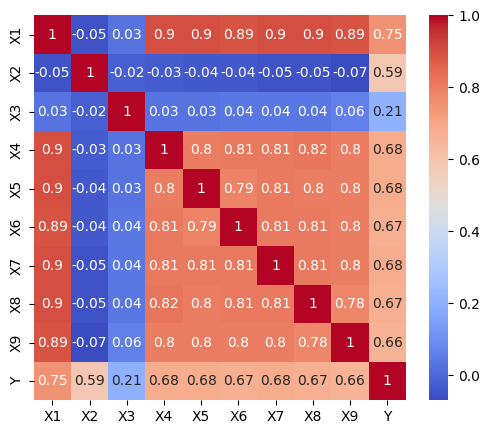

In [4]:
# Judging correlation
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr().round(2), annot = True, cmap="coolwarm")
plt.show()

In [5]:
# IMPLEMENTING GRADIENT DESCENT FOR L2-NORMALISED RIDGE REGRESSION

# Step-1: Find gradient of new loss function with regularisation parameter 'l'
def D_SSE_L2(X, y, beta, r):
    n, k = X.shape
    # Again, we assume X has a column of 1's for intercept
    X = np.insert(X, 0, 1, axis=1)
    # We need a matrix denoting 'Ip' i.e. identity matrix with null row and columns prepended to it
    # This is so that the GD model will ignore optimising the intercept
    Ip = np.eye(k+1)
    Ip[0, 0] = 0
    return ((-1/n) * (X.T @ (y - X @ beta))) + ((r/n * Ip) @ beta)

def GDRidgeRegression(X, y, r=0, lr=0.01, n_iter=1000):
    n, k = X.shape
    # Step-2: Assume initial constants = 0
    beta = np.zeros(k+1)

    for _ in range(n_iter):
        # Step-3: Find gradient at assumed coefficients
        grad = D_SSE_L2(X, y, beta, r)
        # Step-4: Step size
        step_size = grad * lr
        # Step-5: New beta
        beta -= step_size

        # safety: break if numbers blow up
        if np.any(np.isnan(beta)) or np.any(np.isinf(beta)):
            raise ValueError(f"Diverged for lr={lr}, r={r}")

    return beta

In [6]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df.drop("Y", axis=1)
y = df["Y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Running GDR for different learning rates and regularisation parameters, and getting R2 score
from sklearn.metrics import r2_score

lr = [0.0001 , 0.001, 0.01, 0.1, 1, 10]
r_params = [1e-15, 1e-10, 1e-5, 1e-3, 0, 1, 10, 20]
epoch = 1000

betas = []
final_params = []
for r in r_params:
    for l in lr:
        print(f"REGULARISATION PARAMETER {r} ON LEARNING RATE {l}: ", end="")

        try:
            best_betas = GDRidgeRegression(X_train, y_train, r, l, epoch)

            y_pred = (X_test @ best_betas[1:]) + best_betas[0]
            r2 = r2_score(y_test, y_pred)
            print(f"R2 score = {r2}")
        except ValueError:
            print(f"❌ Diverged")
            best_betas = None
            r2 = -np.inf
        final_params.append({"r": r, "l": l, "r2": r2, "betas": best_betas})

REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 0.0001: R2 score = 0.4891292675238692
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 0.001: R2 score = 0.9203262868102307
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 0.01: R2 score = 0.9850044941892336
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 0.1: R2 score = 0.9936504561326809
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 1: ❌ Diverged
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 10: ❌ Diverged
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 0.0001: R2 score = 0.4891292675238671
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 0.001: R2 score = 0.92032628681022
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 0.01: R2 score = 0.9850044941892329
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 0.1: R2 score = 0.9936504561326811
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 1: ❌ Diverged
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 10: ❌ Diverged
REGULARISATION PARAMETER 1e-05 ON LEARNING RATE 0.0001: R2 score = 0.4891292

In [8]:
# Getting best learning rate & regularisation parameter

best_params = max(final_params, key=lambda d: d["r2"])
best_r, best_l, best_r2, best_betas = best_params["r"], best_params["l"], best_params["r2"], best_params["betas"]

print(f"Best regularisation parameter = {best_r} with learning rate = {best_l} having")
print(f"\tTest R2 score = {best_r2}")
print(f"\t& Beta values = {best_betas}")

Best regularisation parameter = 0.001 with learning rate = 0.1 having
	Test R2 score = 0.9936504580574339
	& Beta values = [-4.45635102e-01  9.47611866e+01  8.29679228e+01  2.58288422e+01
 -9.11023441e-02  1.63989939e+00  7.41363987e-01  4.82887820e-01
  5.95556231e-01  1.69461150e-01]


As we can see with ridge regression, for highly correlated & redundant features $X4$ to $X9$, corresponding regression coefficients $\beta_4$ to $\beta_9$ are very small & have been penalised, as shrinking these coefficients won't impact final performance!

# Q2. Hitters dataset
---

Load the Hitters dataset from the following link

https://drive.google.com/file/d/1qzCKF6JKKMB0p7ul_lLy8tdmRk3vE_bG/view?usp=sharing

In [9]:
!curl -L -o /content/hitters.zip https://www.kaggle.com/api/v1/datasets/download/floser/hitters
!unzip -o hitters.zip
!rm hitters.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9173  100  9173    0     0   5677      0  0:00:01  0:00:01 --:--:--     0
Archive:  hitters.zip
  inflating: Hitters.csv             


In [10]:
df = pd.read_csv("/content/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

### (a) Pre-process the data (null values, noise, categorical to numerical encoding)

In [12]:
# Records with null vals
df.isna().any(axis=1).sum()

np.int64(59)

In [13]:
# Features wwith null vals
df.columns[df.isna().any(axis=0)]

Index(['Salary'], dtype='object')

In [14]:
# Removing null target variables
df_nonull = df.dropna(subset=["Salary"])
df_nonull.isna().any().any()

np.False_

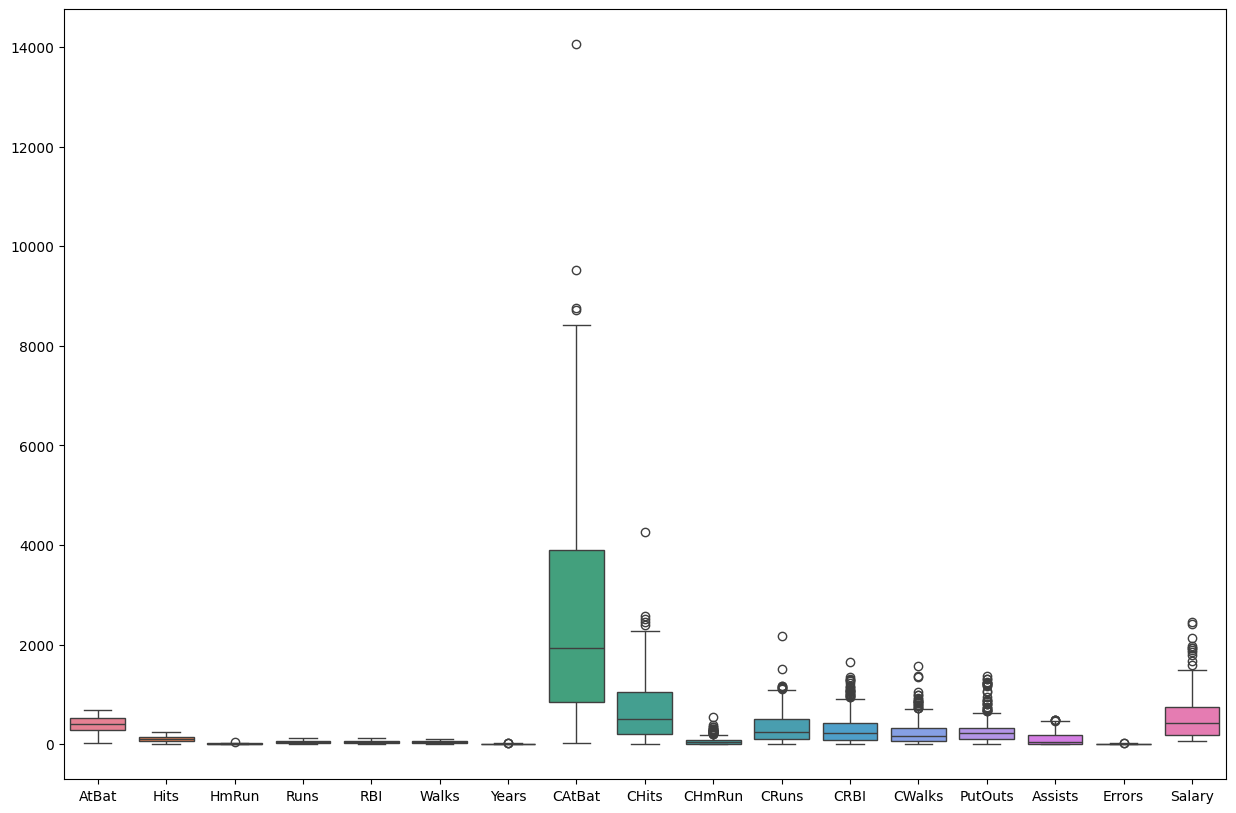

In [15]:
# Checking for noise and outliers using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_nonull)
plt.show()

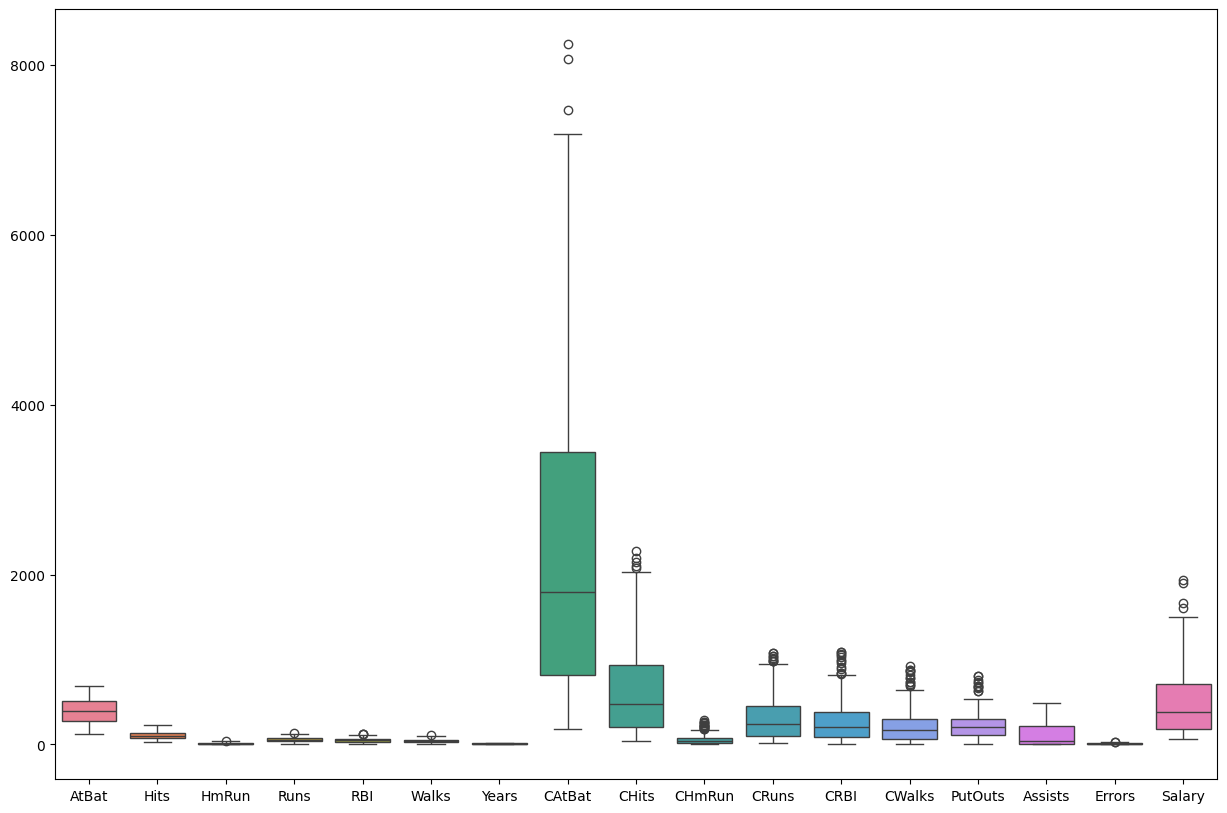

In [16]:
# Removing noise using IQR Method
df_nonoise = df_nonull.copy(deep=True)

for col in df_nonull.select_dtypes(include='number').columns:
    Q1 = df_nonull[col].quantile(0.25)
    Q3 = df_nonull[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.0 * IQR
    upper = Q3 + 2.5 * IQR                  # unequal IQR range for right-skewed data
    df_nonoise = df_nonoise[(df_nonoise[col] >= lower) & (df_nonoise[col] <= upper)]

df_nonoise.reset_index(drop=True, inplace=True)

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_nonoise)
plt.show()

In [17]:
# Selecting categorical variables
cat_vars = df_nonoise.select_dtypes(include="object").columns

for col in cat_vars:
    print(f"{col}: {df_nonoise[col].unique()}")

League: ['N' 'A']
Division: ['W' 'E']
NewLeague: ['N' 'A']


In [18]:
# As all are just binary, let's use binary label encoding
league_mapping = {"A": 1, "N": 0}
division_mapping = {"E": 0, "W": 1}

df_encoded = df_nonoise.copy(deep=True)
df_encoded["League"] = df_nonoise["League"].map(league_mapping)
df_encoded["NewLeague"] = df_nonoise["NewLeague"].map(league_mapping)
df_encoded["Division"] = df_nonoise["Division"].map(division_mapping)

df_encoded.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,1,632,43,10,475.0,0
1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,0,200,11,3,500.0,0
2,321,87,10,39,42,30,2,396,101,12,48,46,33,0,0,805,40,4,91.5,0
3,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,1,282,421,25,750.0,1
4,185,37,1,23,8,21,2,214,42,1,30,9,24,0,0,76,127,7,70.0,1


### (b) Separate input and output features and perform scaling

In [19]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Salary", axis=1)
y = df_encoded["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

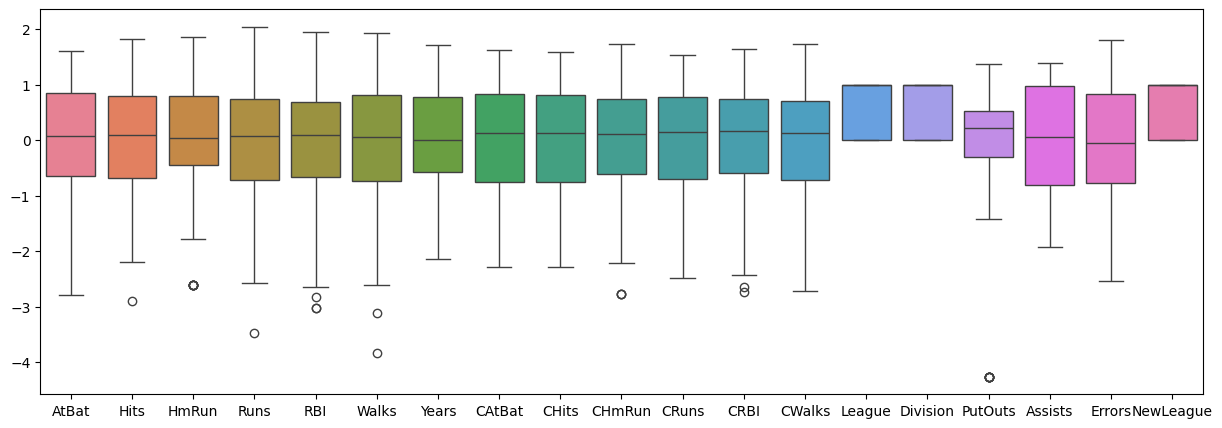

In [20]:
# As from the boxplot we see that the data is mostly right-skewed, let's log-transform all vars and then apply robust normalisation
from sklearn.preprocessing import StandardScaler

num_vars = X_train.drop(columns=cat_vars).columns

# Log-Transform
X_train[num_vars] = np.log1p(X_train[num_vars])
X_test[num_vars] = np.log1p(X_test[num_vars])

# Standard Normalisation
sc = StandardScaler()
X_train[num_vars] = sc.fit_transform(X_train[num_vars])
X_test[num_vars] = sc.transform(X_test[num_vars])

# log-transform target
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

plt.figure(figsize=(15, 5))
sns.boxplot(data=X_train)
plt.show()

### (c) Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use regularization parameter as 0.5748) regression function on the dataset

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr = LinearRegression()
lr = lr.fit(X_train, y_train)

ridge = Ridge(alpha=0.5748)
ridge = ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.5748)
lasso = lasso.fit(X_train, y_train)

### (d) Evaluate the performance of each trained model on test set. Which model performs the best and why?

In [22]:
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [23]:
from sklearn.metrics import r2_score

print(f"Linear Regression R2 score = {r2_score(y_test, y_pred_lr)}")
print(f"Ridge Regression R2 score = {r2_score(y_test, y_pred_ridge)}")
print(f"Lasso Regression R2 score = {r2_score(y_test, y_pred_lasso)}")

Linear Regression R2 score = 0.7544791474131359
Ridge Regression R2 score = 0.7527120693250695
Lasso Regression R2 score = 0.19300235511540265


Here, linear regression performs the best, slightly outperforming Ridge and far ahead of LASSO.

This indicates that the dataset's features have a strong linear relationship with the target variable "Salary" and that regularization adds little benefit.

LASSO underperforms because it *over-penalizes coefficients* with high alpha value, shrinking many informative variables toward zero in a dataset with correlated predictors!

# Q3: Cross Validation for Ridge and Lasso Regression
---

Explore Ridge Cross Validation (RidgeCV) and Lasso Cross Validation (LassoCV)
function of Python. Implement both on Boston House Prediction Dataset (load_boston
dataset from sklearn.datasets).

In [24]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [25]:
# Cleaning DataFrame
cat_vars = df.select_dtypes(include="category").columns
num_vars = df.select_dtypes(include="number").columns

df[cat_vars] = df[cat_vars].apply(lambda x: x.cat.codes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int8   
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int8   
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int8(2)
memory usage: 48.6 KB


**RidgeCV:** Ridge regression with built-in cross-validation. By default, it performs efficient Leave-One-Out Cross-Validation.

**LassoCV:** Lasso linear model with iterative fitting along a regularization path. The best model is selected by cross-validation.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import RidgeCV, LassoCV

alphas = np.logspace(-6, 6, 100)
ridge = RidgeCV(alphas=alphas, scoring="r2", cv=10).fit(X_train, y_train)
lasso = LassoCV(alphas=alphas, cv=10, max_iter=100000, random_state=42).fit(X_train, y_train)

print("RIDGE REGRESSION (L2):-")
print(f"\tTraining R2 score = {ridge.score(X_train, y_train):.4f}")
print(f"\t Testing R2 score = {ridge.score(X_test, y_test):.4f}")
print(f"\tBest regularisation parameter = {ridge.alpha_}")

print("\nLASSO REGRESSION (L1):-")
print(f"\tTraining R2 score = {lasso.score(X_train, y_train):.4f}")
print(f"\t Testing R2 score = {lasso.score(X_test, y_test):.4f}")
print(f"\tBest regularisation parameter = {lasso.alpha_}")

RIDGE REGRESSION (L2):-
	Training R2 score = 0.5814
	 Testing R2 score = 0.4739
	Best regularisation parameter = 35111.917342151275

LASSO REGRESSION (L1):-
	Training R2 score = 0.5533
	 Testing R2 score = 0.4494
	Best regularisation parameter = 1232.8467394420684


# Q4: Multiclass Logistic Regression
---

Implement Multiclass Logistic Regression (step-by step)
on Iris dataset using one vs. rest strategy

In [28]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

lr = LogisticRegression(penalty="l2", solver="liblinear")
ovr = OneVsRestClassifier(lr)
model = ovr.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("ONE-VS-ALL MULTI-CLASS LOGISTIC REGRESSION:-")
print(f"\tTraining Accuracy = {accuracy_score(y_train, y_train_pred):.4f}")
print(f"\tTesting Accuracy  = {accuracy_score(y_test, y_test_pred):.4f}")

ONE-VS-ALL MULTI-CLASS LOGISTIC REGRESSION:-
	Training Accuracy = 0.9619
	Testing Accuracy  = 0.9778
